In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
# Additional Libraries
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Additional Libraries imported.')

Additional Libraries imported.


In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [4]:
def get_venues(latitude,longitude):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'E0IMNYNCMI4Z5UR4SSDPKX44VAOMPIF1DN52LK5QQ110Y3BZ' 
    CLIENT_SECRET = '4WXFQTMEH1DTBZAZXG2ZIQF4BEFUWPJA5WVBIBOHFUI5SAG4' 
    VERSION = '20200501' 
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

In [5]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'E0IMNYNCMI4Z5UR4SSDPKX44VAOMPIF1DN52LK5QQ110Y3BZ' 
    CLIENT_SECRET = '4WXFQTMEH1DTBZAZXG2ZIQF4BEFUWPJA5WVBIBOHFUI5SAG4' 
    VERSION = '20200501' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [6]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [7]:
# get new york data
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
new_york_data.shape

(306, 4)

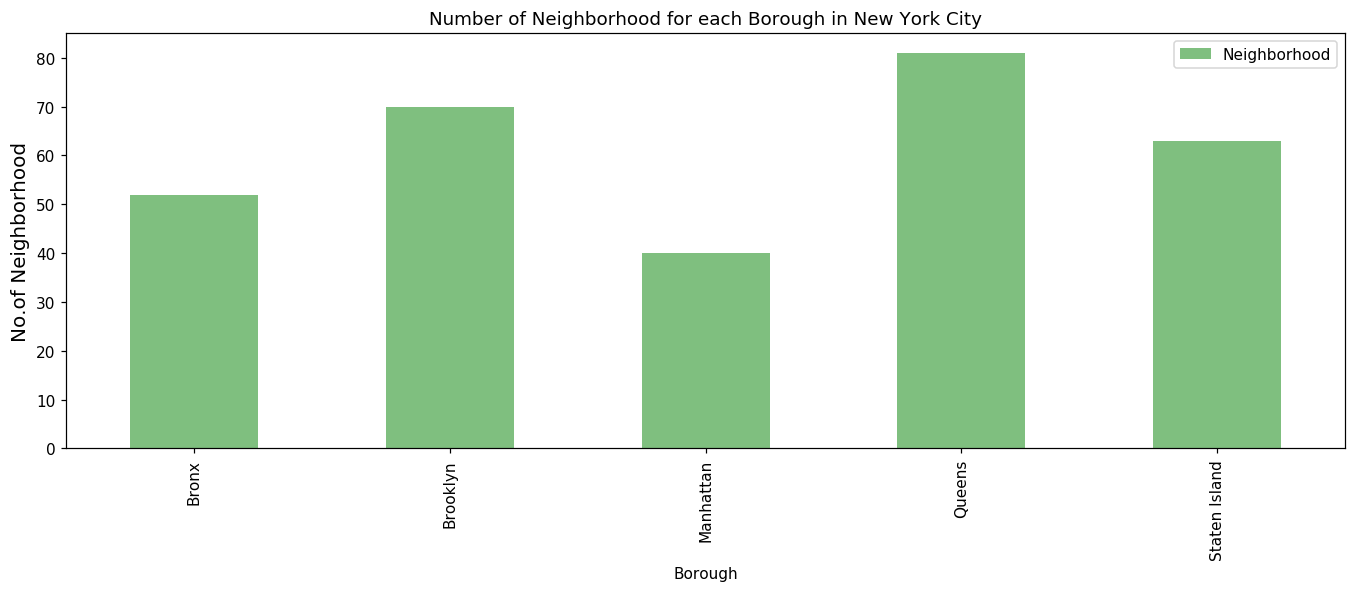

In [9]:
plt.figure(figsize=(15,5), dpi = 110)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 10)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=13)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar',alpha=0.5,color='Green',width=0.5)
#legend
plt.legend()
#displays the plot
plt.show()

In [10]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values:
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'.',')','Number of Indian Resturants in '+Neighborhood+','+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

done
( 1 . ) Number of Indian Resturants in Wakefield,Bronx:0
done
( 2 . ) Number of Indian Resturants in Co-op City,Bronx:0
done
( 3 . ) Number of Indian Resturants in Eastchester,Bronx:0
done
( 4 . ) Number of Indian Resturants in Fieldston,Bronx:0
done
( 5 . ) Number of Indian Resturants in Riverdale,Bronx:0
done
( 6 . ) Number of Indian Resturants in Kingsbridge,Bronx:0
done
( 7 . ) Number of Indian Resturants in Marble Hill,Manhattan:0
done
( 8 . ) Number of Indian Resturants in Woodlawn,Bronx:1
done
( 9 . ) Number of Indian Resturants in Norwood,Bronx:0
done
( 10 . ) Number of Indian Resturants in Williamsbridge,Bronx:0
done
( 11 . ) Number of Indian Resturants in Baychester,Bronx:0
done
( 12 . ) Number of Indian Resturants in Pelham Parkway,Bronx:0
done
( 13 . ) Number of Indian Resturants in City Island,Bronx:0
done
( 14 . ) Number of Indian Resturants in Bedford Park,Bronx:0
done
( 15 . ) Number of Indian Resturants in University Heights,Bronx:0
done
( 16 . ) Number of Indian 

done
( 122 . ) Number of Indian Resturants in Little Italy,Manhattan:0
done
( 123 . ) Number of Indian Resturants in Soho,Manhattan:0
done
( 124 . ) Number of Indian Resturants in West Village,Manhattan:1
done
( 125 . ) Number of Indian Resturants in Manhattan Valley,Manhattan:3
done
( 126 . ) Number of Indian Resturants in Morningside Heights,Manhattan:1
done
( 127 . ) Number of Indian Resturants in Gramercy,Manhattan:5
done
( 128 . ) Number of Indian Resturants in Battery Park City,Manhattan:0
done
( 129 . ) Number of Indian Resturants in Financial District,Manhattan:0
done
( 130 . ) Number of Indian Resturants in Astoria,Queens:1
done
( 131 . ) Number of Indian Resturants in Woodside,Queens:8
done
( 132 . ) Number of Indian Resturants in Jackson Heights,Queens:5
done
( 133 . ) Number of Indian Resturants in Elmhurst,Queens:4
done
( 134 . ) Number of Indian Resturants in Howard Beach,Queens:0
done
( 135 . ) Number of Indian Resturants in Corona,Queens:0
done
( 136 . ) Number of India

done
( 240 . ) Number of Indian Resturants in Charleston,Staten Island:0
done
( 241 . ) Number of Indian Resturants in Rossville,Staten Island:0
done
( 242 . ) Number of Indian Resturants in Arden Heights,Staten Island:0
done
( 243 . ) Number of Indian Resturants in Greenridge,Staten Island:0
done
( 244 . ) Number of Indian Resturants in Heartland Village,Staten Island:0
done
( 245 . ) Number of Indian Resturants in Chelsea,Staten Island:0
done
( 246 . ) Number of Indian Resturants in Bloomfield,Staten Island:0
done
( 247 . ) Number of Indian Resturants in Bulls Head,Staten Island:0
done
( 248 . ) Number of Indian Resturants in Carnegie Hill,Manhattan:1
done
( 249 . ) Number of Indian Resturants in Noho,Manhattan:0
done
( 250 . ) Number of Indian Resturants in Civic Center,Manhattan:1
done
( 251 . ) Number of Indian Resturants in Midtown South,Manhattan:0
done
( 252 . ) Number of Indian Resturants in Richmond Town,Staten Island:0
done
( 253 . ) Number of Indian Resturants in Shore Acre

In [11]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill


In [12]:
indian_rest_ny.shape

(144, 4)

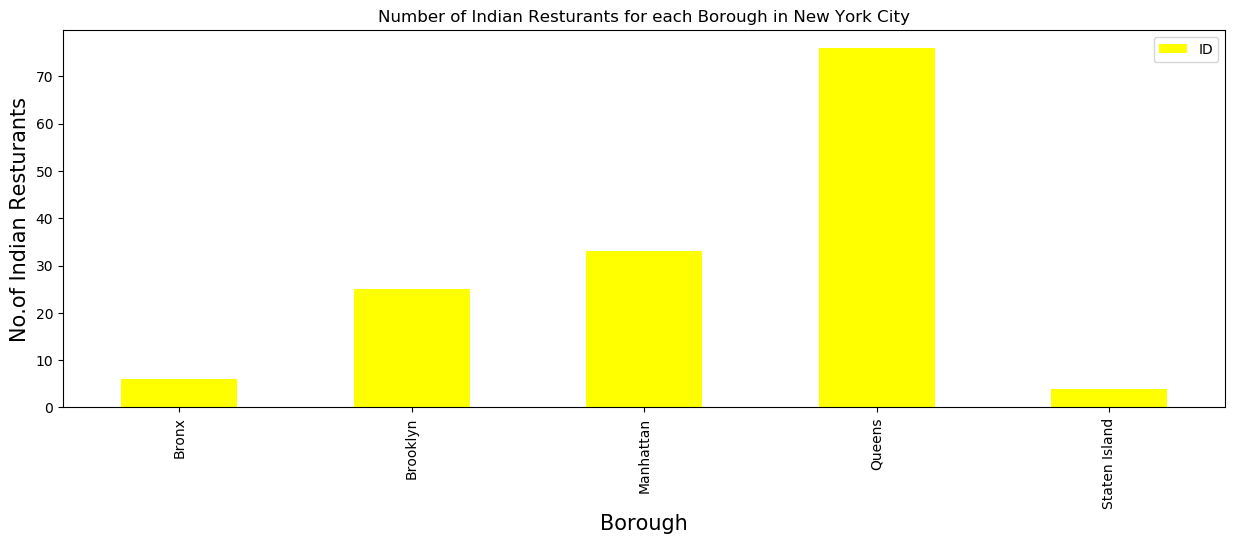

In [13]:
plt.figure(figsize=(15,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar',color='Yellow')
#legend
plt.legend()
#displays the plot
plt.show()

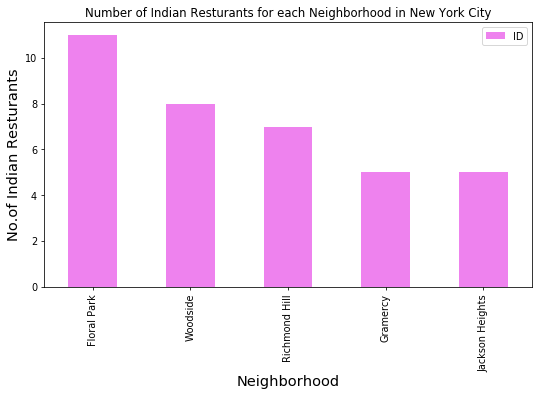

In [80]:
plt.figure(figsize=(9,5), dpi = 70)
# title
plt.title('Number of Indian Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar',color='violet')
#legend
plt.legend()
#displays the plot

plt.show()

In [15]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
101,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
102,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
103,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
104,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
105,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
106,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
107,Queens,Floral Park,4cc642ed306e224b5bf2a76c,Shahi Darbar
108,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese
109,Queens,Floral Park,55d68c1b498ecf05fa196fe1,Namaste Restaurant and Cafe
110,Queens,Floral Park,51d84192498ea979a3c4f13d,Sunshine Grill & Restaurant


In [16]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park'].shape

(11, 4)

In [17]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      5     7.8    10
( 1 / 144 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.0     2
( 2 / 144 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.0     9
( 3 / 144 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     6.8     3
( 4 / 144 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.0     2
( 5 / 144 ) processed
                         ID       Name  Likes  Rating  Tips
0  4b5a4dc8f964a520a2bb28e3  Taj Mahal     38     8.0    26
( 6 / 144 ) processed
                         ID          Name  Likes

KeyError: 'venue'

In [18]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.8,10
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.0,2
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.0,9
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,6.8,3
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.0,2


In [19]:
indian_rest_stats_ny.shape

(50, 7)

In [20]:
indian_rest_ny.shape

(144, 4)

In [22]:
indian_rest_stats_ny.to_csv('indian_restaurant_ny.csv', index=False)

In [23]:
indian_rest_stats_ny_csv=pd.read_csv('indian_restaurant_ny.csv')

In [24]:
indian_rest_stats_ny_csv.shape

(50, 7)

In [25]:
indian_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.8,10
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.0,2
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.0,9
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,6.8,3
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.0,2


In [34]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')

In [35]:
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')

In [26]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough         50 non-null object
Neighborhood    50 non-null object
ID              50 non-null object
Name            50 non-null object
Likes           50 non-null object
Rating          50 non-null float64
Tips            50 non-null object
dtypes: float64(1), object(6)
memory usage: 2.8+ KB


In [31]:
# Resturant with maximum Rating
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                 Fort Greene
ID              57596dad498e732300496b23
Name                         Dosa Royale
Likes                                 75
Rating                               8.8
Tips                                  22
Name: 15, dtype: object

In [36]:
# Resturant with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                    Gramercy
ID              4a12eb1ff964a52099771fe3
Name                               Dhaba
Likes                                497
Rating                               8.3
Tips                                 164
Name: 48, dtype: object

In [37]:
# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               8.6
Tips                                 148
Name: 40, dtype: object

In [38]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [39]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
3,Chelsea,8.8
4,Clinton Hill,8.8
10,Fort Greene,8.8
24,Prospect Lefferts Gardens,8.7
32,West Village,8.7
23,Prospect Heights,8.7
20,Murray Hill,8.6
28,Tribeca,8.6
30,Upper West Side,8.5
26,Roosevelt Island,8.5


In [40]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [41]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.126923
1,Brooklyn,7.836842
0,Bronx,6.520000


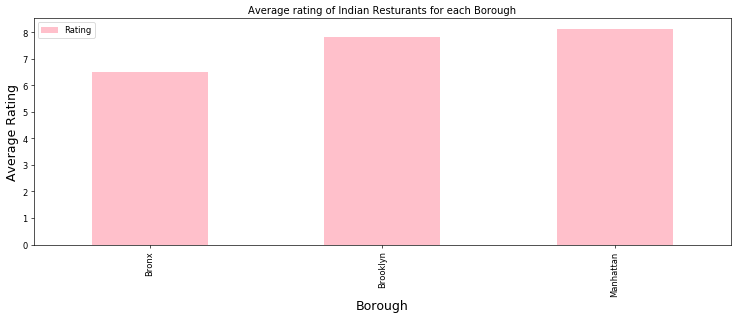

In [76]:
plt.figure(figsize=(15,5), dpi = 60)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar',color='pink')
#legend
plt.legend()
#displays the plot
plt.show()

In [57]:
ny_neighborhood_statss=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.8]

In [58]:
ny_neighborhood_statss

,Borough,Neighborhood,Latitude,Longitude,Average Rating


In [59]:
ny_neighborhood_statss=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [60]:
ny_neighborhood_statss=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [61]:
ny_neighborhood_statss

,Borough,Neighborhood,Latitude,Longitude,Average Rating


In [62]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [63]:
ny_map

In [64]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [65]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [66]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

# Conclusions

+ Manhattan have potential Indian Resturant Market
+ Manhattan is the best place to stay if you prefer Indian Cuisine.
+ Chelsea ranks first in average rating of Indian Resturants.
+ Astoria(Queens), Blissville(Queens), Civic Center(Manhattan) are some of the best neighborhoods for indian cuisine.

# Limitation

+ The accuracy of data depends purely depends on the data provided by FourSquare
+ The ranking is purely on basis of rating of resturants

# Thanks.